In [55]:
from skimage.filters import threshold_local
import numpy as np
import cv2
import imutils

In [56]:
from google.colab.patches import cv2_imshow

In [57]:
!pip install --upgrade imutils

Requirement already up-to-date: imutils in /usr/local/lib/python3.7/dist-packages (0.5.4)


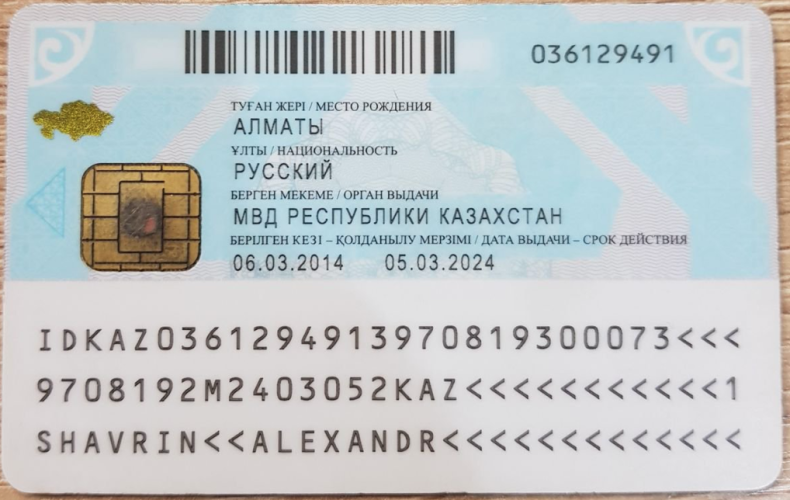

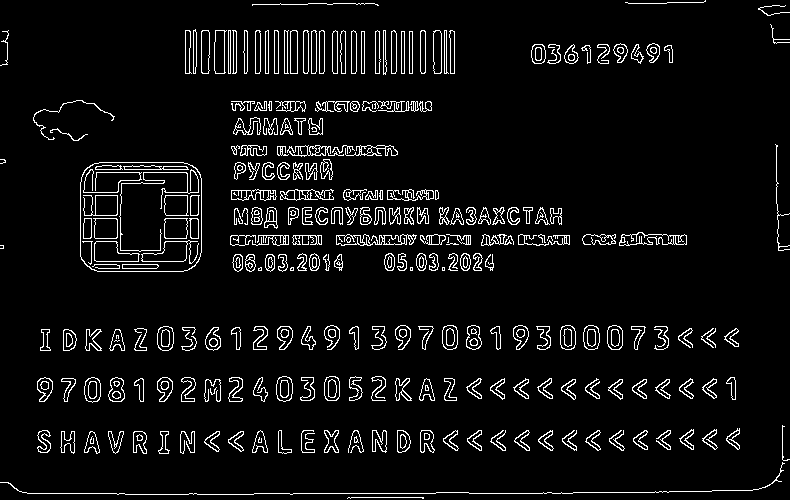

In [58]:
image = cv2.imread("/content/удл2.png")
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500)
 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)
 
cv2_imshow(image)
cv2_imshow(edged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [59]:
def order_points(pts):
	rect = np.zeros((4, 2), dtype = "float32")
 
	s = pts.sum(axis = 1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]
 
	diff = np.diff(pts, axis = 1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]
 
	return rect


def four_point_transform(image, pts):
	rect = order_points(pts)
	(tl, tr, br, bl) = rect
 
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
 
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
 
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")
 
	M = cv2.getPerspectiveTransform(rect, dst)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
 
	return warped

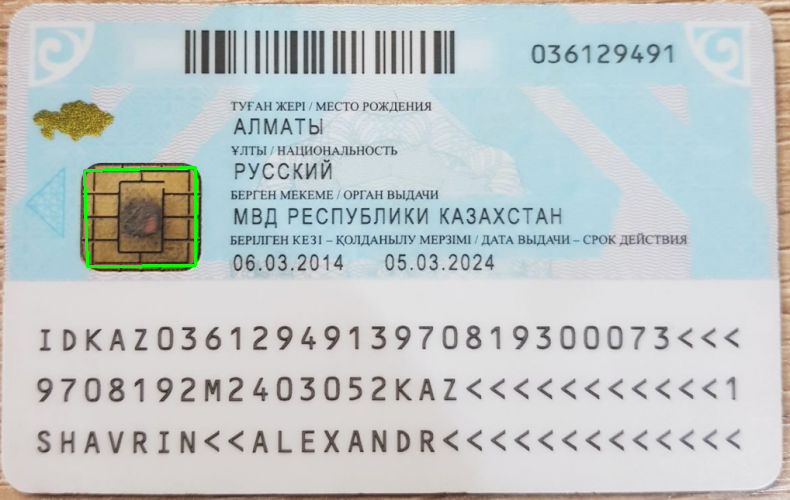

In [60]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
 
for c in cnts:
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
	if len(approx) == 4:
		screenCnt = approx
		break
 
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

STEP 3: Apply perspective transform


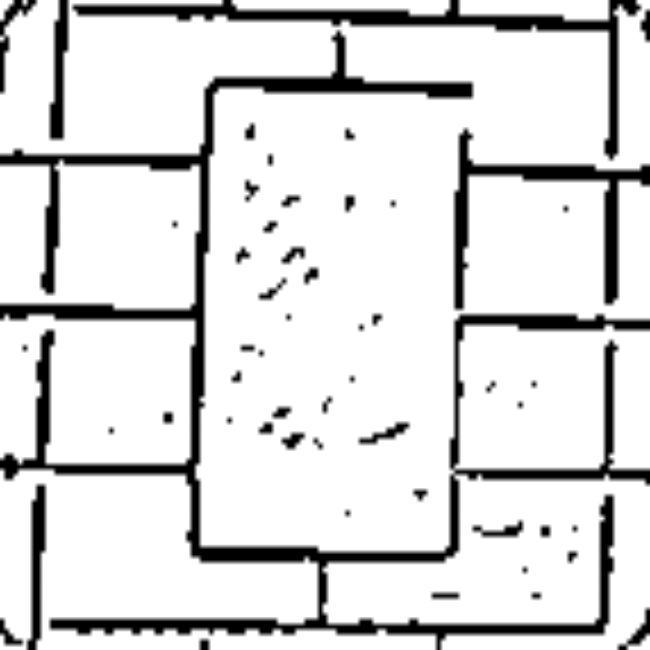

-1

In [61]:
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
 
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
T = threshold_local(warped, 11, offset = 10, method = "gaussian")
warped = (warped > T).astype("uint8") * 255
 
# show the scanned image and save one copy in out folder
print("STEP 3: Apply perspective transform")

imS = cv2.resize(warped, (650, 650))
cv2_imshow(imS)
cv2.imwrite('out/'+'Output Image.PNG', imS)
cv2.waitKey(0)

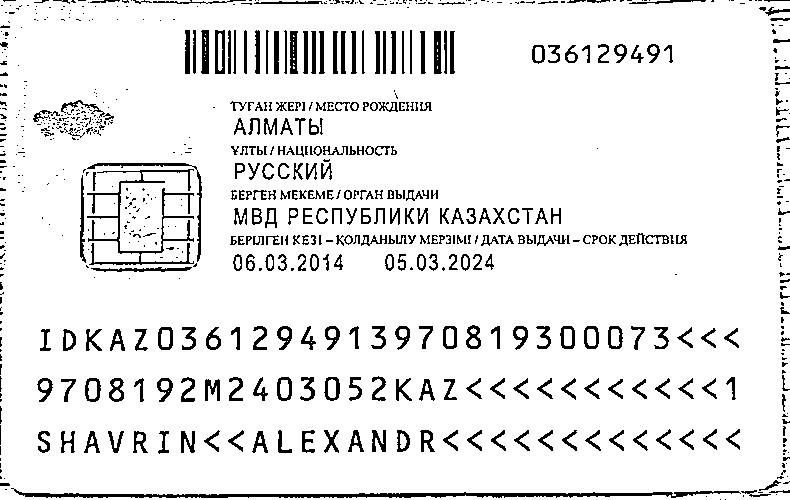

-1

In [62]:
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
 
warped = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
T = threshold_local(warped, 13, offset = 10, method = "gaussian")
imS = (warped > T).astype("uint8") * 255
 

# imS = cv2.resize(warped, (650, 650))
cv2_imshow(imS)
cv2.waitKey(0)

In [63]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [64]:
!sudo apt-get install tesseract-ocr-kaz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-kaz is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [65]:
!pip install pytesseract

In [66]:
from PIL import Image
import PIL.Image

from pytesseract import image_to_string
import pytesseract

output = pytesseract.image_to_string(imS, lang='kaz')
print(output)

f = open('data.json','w')
f.write(output)
f.close()

2 СІШІШІШІШІШ озөегзен

ТУҒАН ЖЕРІ/ МЕСТО РОЖДЕНИЯ

АЛМАТЫ

ҰЛТЫ НАЦПОНАЛЬНОСТЬ

РУССКИЙ

БЕРГЕН МЕКЕМЕ// ОРГАН ВЫДАЧИ

МВД РЕСПУБЛИКИ КАЗАХСТАН
БЕРІЛГЕН КЕЗІ - ҚОЛДАНЫЛУ МЕРЗІМІ: ДАТА ВЫДАЧИ - СРОК ДЕЙСТВИЯ

ЕШ) 06.03.2014 05.03.2024

 

  

 

 

 

 

 

 

 

10КА20361294913970819500073<<<
9708192М2405052КА7<<<<<<<<<<<1
ЭНАУКІМ<<АГЕХАМВЕ<<<<<<<<<<<<<

 



In [67]:
import re

numbers = re.findall(r'[0-9]{2}.[0-9]{2}.[0-9]{4} [0-9]{2}.[0-9]{2}.[0-9]{4}', output)

print(numbers)

for number in numbers:
	print('Date :-> ' + number)

['06.03.2014 05.03.2024']
Date :-> 06.03.2014 05.03.2024
